# Problem Statement:

##Context:

Communications equipment manufacturing company has approaoded that is responsible for emitting informative signals.

The company wants to build a machine learning model that can help the company credit the equipments signal quality using various parameter.
##objective:
To build a classifier that can use a given parameter to determine the signal strength or quality

##Data dictionary:
The data set contains information on various signal test performed:
* parameters: various measurable signal parameters
* signal_quality: For signal strength or quality.


# Importing Libraries

In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 10.1 MB/s eta 0:00:00
  Att

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
# The KerasClassifier has been moved to tensorflow.keras.wrappers.scikit_learn in TensorFlow 2.
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

## Loading the data

In [ ]:
Data = pd.read_csv('NN Project Data - Signal.csv')

## Overview of the dataset

In [ ]:
df=Data.copy()

In [ ]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Finding the shape of the dataset

In [ ]:
df.shape

(1599, 12)

* There are 1599 rows and 12 columns in the given dataset.

## Check the data types of the columns in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## checking the missing values

In [ ]:
df.isnull().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


* There are no missing values in the given dataset

* There are 12  columns and 1599 observations in the dataset.

## Checking duplicates

In [ ]:
df.duplicated().sum()

240

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.shape

(1359, 12)

In [ ]:
# Split features and target
X = df.drop('Signal_Strength', axis=1)
y = df['Signal_Strength']

In [ ]:
# Display unique values in Signal_Quality
print("Unique values in Signal_Strength column:")
print(df['Signal_Strength'].unique())

Unique values in Signal_Strength column:
[5 6 7 4 8 3]


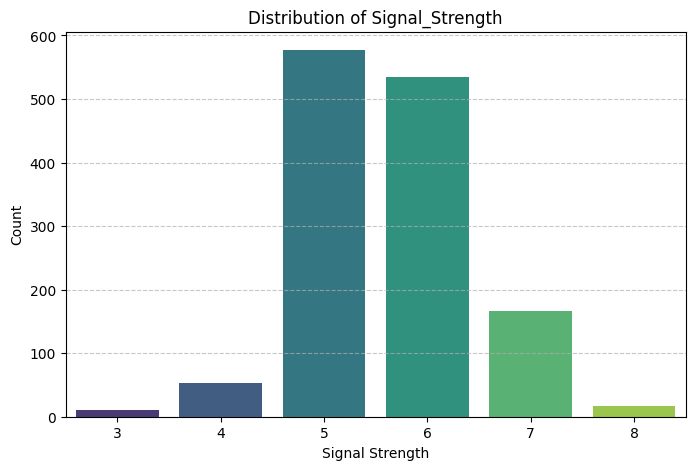

In [ ]:
# visualizing the distribution of the target variable Signal_Strength
plt.figure(figsize=(8, 5))
sns.countplot(x='Signal_Strength', data=df, palette='viridis')
plt.title('Distribution of Signal_Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Signal strengths 5 and 6 have very high values, dominating.
* Signal strength 8 and 3 are far lesser.

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
# Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

In [ ]:
# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
24/24 [==============================] - 2s 26ms/step - loss: 5.5408 - accuracy: 0.2395 - val_loss: 1.5180 - val_accuracy: 0.3298
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 1.4622 - accuracy: 0.4039 - val_loss: 1.2732 - val_accuracy: 0.3665
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.2313 - accuracy: 0.4342 - val_loss: 1.1849 - val_accuracy: 0.4974
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.2111 - accuracy: 0.4671 - val_loss: 1.1713 - val_accuracy: 0.5236
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 1.1866 - accuracy: 0.4697 - val_loss: 1.1697 - val_accuracy: 0.5183
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 1.1674 - accuracy: 0.4711 - val_loss: 1.1861 - val_accuracy: 0.5131
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 1.1614 - accuracy: 0.4803 - val_loss: 1.1519 - val_accuracy: 0.5079
Epoch 8/50
24/24 [=

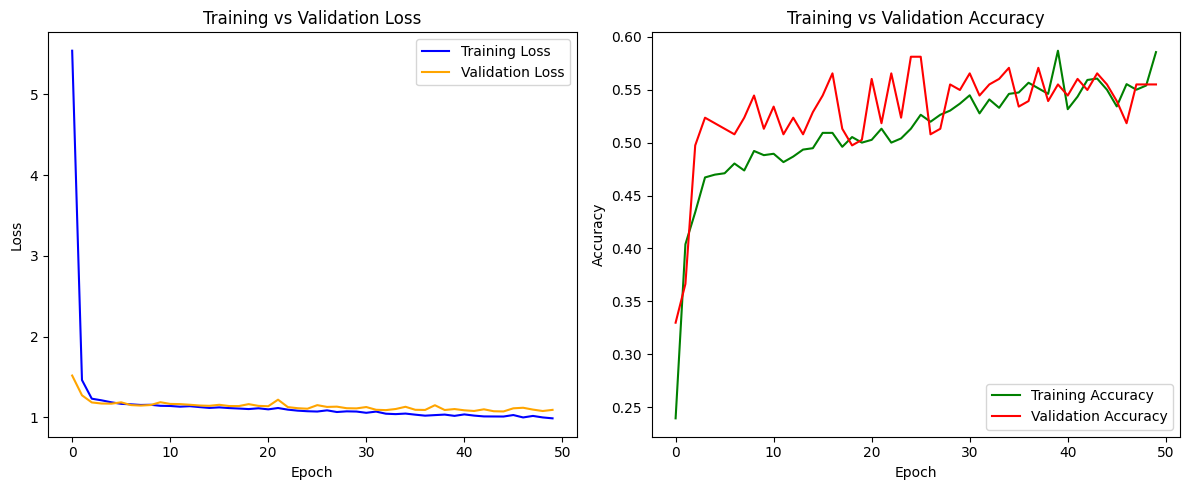

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


* Training accuracy is moderate, and validation accuracy is even lower.
* Validation loss is higher than training loss.
* model might be underfitting.

# Adding droputs for regularization:

In [ ]:
num_classes = len(encoder.classes_)
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),  # Drop 30% of nodes randomly
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
28/28 [==============================] - 0s 7ms/step - loss: 0.9031 - accuracy: 0.6145 - val_loss: 1.0119 - val_accuracy: 0.6239
Epoch 2/50
28/28 [==============================] - 0s 6ms/step - loss: 0.9228 - accuracy: 0.6180 - val_loss: 1.0117 - val_accuracy: 0.6284
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.9193 - accuracy: 0.6122 - val_loss: 1.0097 - val_accuracy: 0.6239
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 0.8936 - accuracy: 0.6133 - val_loss: 1.0089 - val_accuracy: 0.6284
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 0.9256 - accuracy: 0.5984 - val_loss: 1.0068 - val_accuracy: 0.6239
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 0.9181 - accuracy: 0.6180 - val_loss: 1.0067 - val_accuracy: 0.6284
Epoch 7/50
28/28 [==============================] - 0s 5ms/step - loss: 0.9047 - accuracy: 0.6064 - val_loss: 1.0035 - val_accuracy: 0.6376
Epoch 8/50
28/28 [==

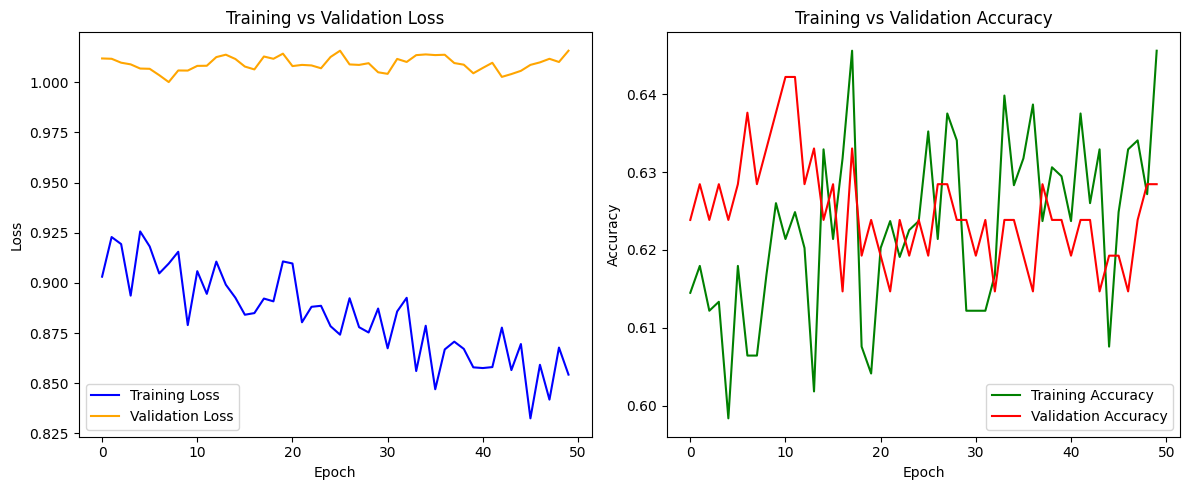

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

* validation accuracy (63.3%) is slightly better than the training accuracy (60.5%).
* The gap between training and validation loss is reasonable.

In [ ]:
from tensorflow.keras.optimizers import Adam
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
num_classes = len(encoder.classes_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build improved ANN model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
28/28 [==============================] - 3s 17ms/step - loss: 2.0897 - accuracy: 0.2773 - val_loss: 1.6808 - val_accuracy: 0.4450
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 1.6689 - accuracy: 0.4166 - val_loss: 1.5230 - val_accuracy: 0.5367
Epoch 3/100
28/28 [==============================] - 0s 7ms/step - loss: 1.5312 - accuracy: 0.4730 - val_loss: 1.4148 - val_accuracy: 0.5505
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 1.4504 - accuracy: 0.4994 - val_loss: 1.3367 - val_accuracy: 0.5734
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 1.3314 - accuracy: 0.5662 - val_loss: 1.2770 - val_accuracy: 0.5872
Epoch 6/100
28/28 [==============================] - 0s 7ms/step - loss: 1.2820 - accuracy: 0.5800 - val_loss: 1.2366 - val_accuracy: 0.6055
Epoch 7/100
28/28 [==============================] - 0s 6ms/step - loss: 1.2410 - accuracy: 0.5662 - val_loss: 1.1926 - val_accuracy: 0.6055
Epoch 8/100


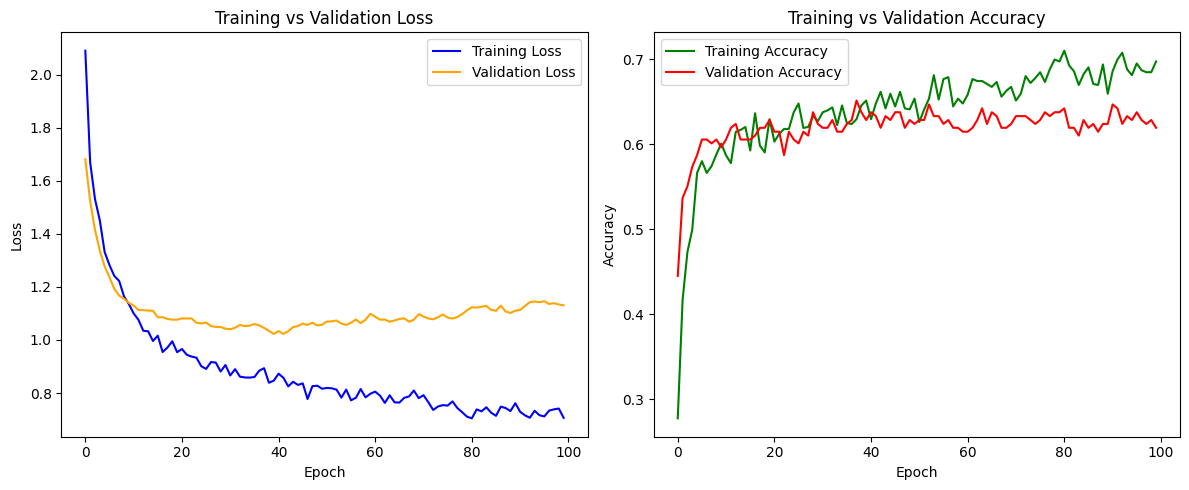

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


* Training accuracy is higher than validation accuracy.
* validation loss is higher than train loss
# Using Batch normalization to speedup training:



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
num_classes = len(encoder.classes_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build improved and regularized ANN model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Increased

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Increased

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Increased

    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Add early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop])


Epoch 1/100
28/28 [==============================] - 2s 13ms/step - loss: 2.0931 - accuracy: 0.2543 - val_loss: 1.6288 - val_accuracy: 0.4908
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 1.7716 - accuracy: 0.3590 - val_loss: 1.5137 - val_accuracy: 0.5688
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 1.6062 - accuracy: 0.4304 - val_loss: 1.4230 - val_accuracy: 0.5413
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 1.4892 - accuracy: 0.4960 - val_loss: 1.3575 - val_accuracy: 0.5459
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 1.4589 - accuracy: 0.4925 - val_loss: 1.2972 - val_accuracy: 0.5596
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 1.4003 - accuracy: 0.5006 - val_loss: 1.2477 - val_accuracy: 0.5596
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 1.3579 - accuracy: 0.4971 - val_loss: 1.2067 - val_accuracy: 0.5642
Epoch 8/100


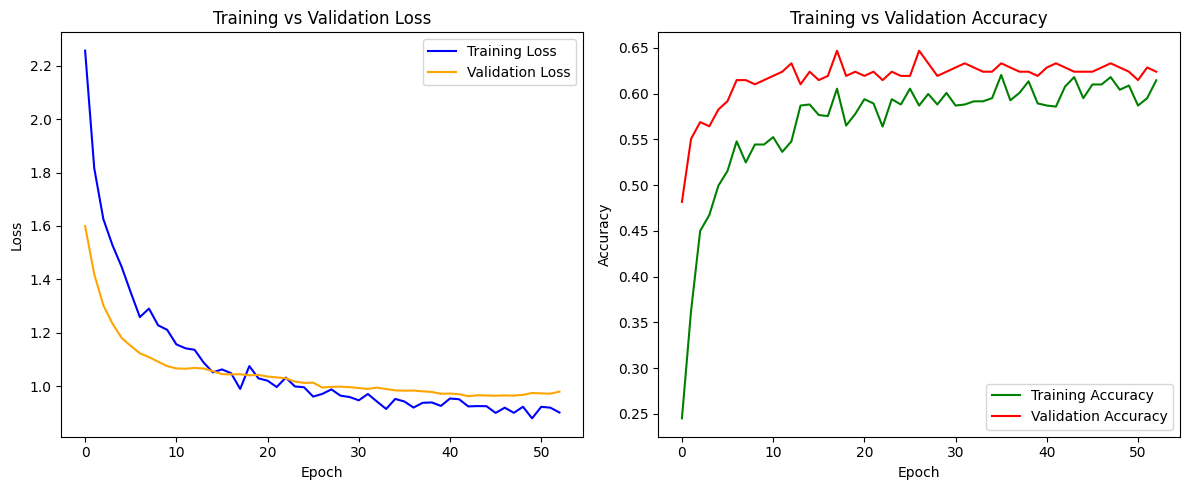

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


* The training and validation accuracy are almost identical, But the accuracies are still low.

# Part-B

 Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project, we will use the dataset with images centered around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractor

## Objective:
To build a digit classifier on the SVHN (Street View Housing Number) dataset.

## Data Dictionary:

"The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of these images are the prominent number in that image i.e. 2,6,7 and 4 respectively. The dataset has been provided in the form of h5py files. You can read about this file"

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
pip install h5py

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Autonomous_Vehicles_SVHN_single_grey1 (1).h5 to Autonomous_Vehicles_SVHN_single_grey1 (1).h5


In [ ]:
import os
print(os.listdir())

['.config', 'Autonomous_Vehicles_SVHN_single_grey1 (1).h5', 'NN Project Data - Signal.csv', 'sample_data']


In [ ]:
import h5py
import numpy as np

# Open the SVHN dataset file
with h5py.File('/content/Autonomous_Vehicles_SVHN_single_grey1 (1).h5', 'r') as f:
    # Print available keys to understand the file structure
    print("Keys in HDF5 file:", list(f.keys()))


    X = np.array(f['X_train'])
    y = np.array(f['y_train'])


Keys in HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [ ]:
import h5py
import numpy as np

# Replace 'Autonomous_Vehicles_SVHN_single_grey1 (1).h5' with the actual filename if different
with h5py.File('/content/Autonomous_Vehicles_SVHN_single_grey1 (1).h5', 'r') as f:
    X_train = np.array(f['X_train'])
    y_train = np.array(f['y_train'])
    X_val   = np.array(f['X_val'])
    y_val   = np.array(f['y_val'])
    X_test  = np.array(f['X_test'])
    y_test  = np.array(f['y_test'])

print("Training shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Training shape: (42000, 32, 32) (42000,)
Validation shape: (60000, 32, 32) (60000,)
Test shape: (18000, 32, 32) (18000,)


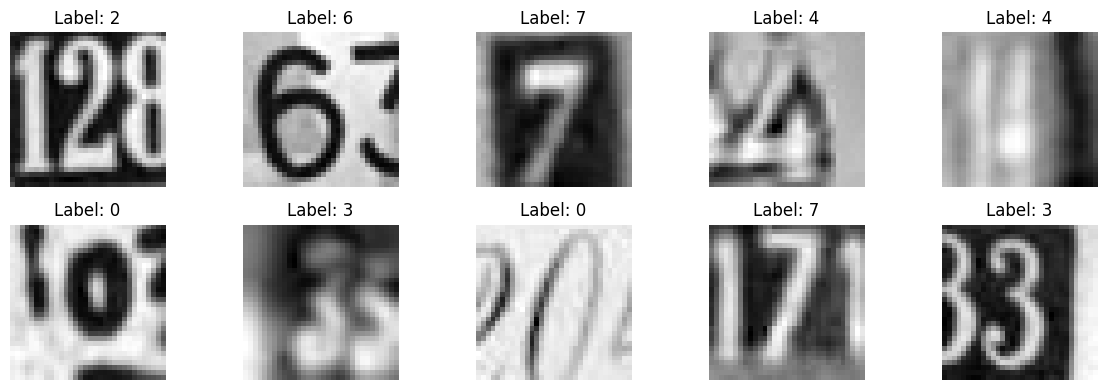

In [ ]:
import matplotlib.pyplot as plt

# Visualize first 10 training images and their labels
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')  # Use squeeze for (32, 32, 1) to (32, 32)
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Expand dimensions to add the single channel
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Normalize
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digit classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5343 - loss: 1.3946 - val_accuracy: 0.8521 - val_loss: 0.5507
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8573 - loss: 0.5270 - val_accuracy: 0.8750 - val_loss: 0.4586
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8757 - loss: 0.4448 - val_accuracy: 0.8751 - val_loss: 0.4377
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8891 - loss: 0.3829 - val_accuracy: 0.8979 - val_loss: 0.3608
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9026 - loss: 0.3397 - val_accuracy: 0.8966 - val_loss: 0.3592
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9086 - loss: 0.3137 - val_accuracy: 0.9135 - val_loss: 0.3044
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9182 - loss: 0.2793 - val_accuracy: 0.9178 - val_loss: 0.2924
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9244 - loss: 0.26

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8976 - loss: 0.3791
Test accuracy: 0.8943889141082764


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


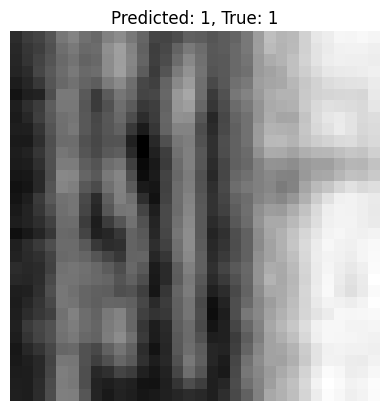

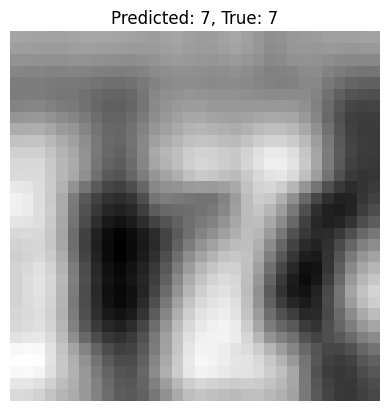

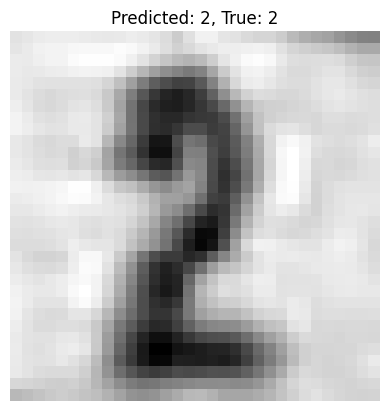

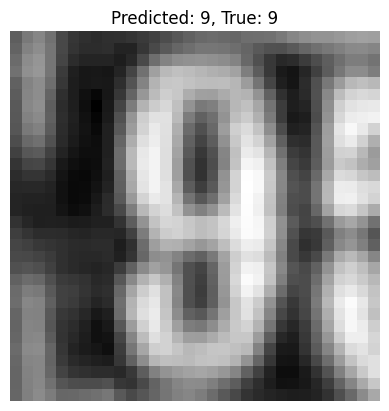

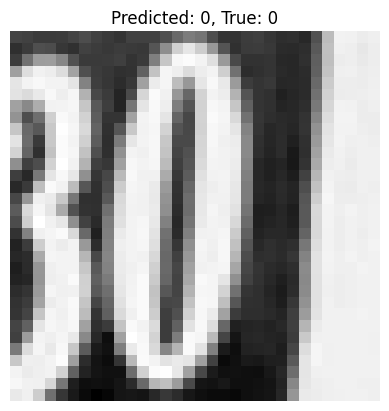

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

for i in range(5):
    plt.imshow(X_test[i].reshape(32, 32), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()


* There's a small drop from training/validation  to test.
* suggests some overfitting

In [ ]:
model.save("svhn_digit_classifier.h5")


# Adding dropouts to reduce overfitting

In [ ]:
#Adding Dropout Layers to reduce overfitting
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,986 (652.29 KB)

 Trainable params: 166,986 (652.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8348 - loss: 0.5403 - val_accuracy: 0.9026 - val_loss: 0.3373
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8333 - loss: 0.5353 - val_accuracy: 0.8980 - val_loss: 0.3410
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8310 - loss: 0.5332 - val_accuracy: 0.9063 - val_loss: 0.3219
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8391 - loss: 0.5236 - val_accuracy: 0.9090 - val_loss: 0.3098
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8380 - loss: 0.5173 - val_accuracy: 0.9132 - val_loss: 0.2952
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8435 - loss: 0.5022 - val_accuracy: 0.9127 - val_loss: 0.2955
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8420 - loss: 0.4983 - val_accuracy: 0.9122 - val_loss: 0.2987
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8425 - loss: 0.494

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy with dropout:", test_acc)


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8973 - loss: 0.3574
Test accuracy with dropout: 0.8916110992431641


* model generalizes well.

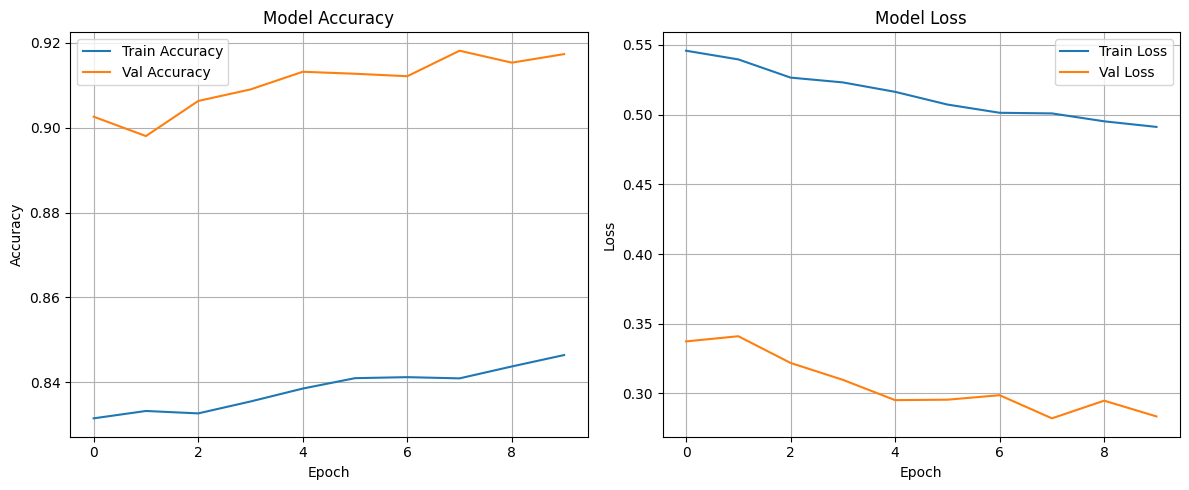

In [ ]:
import matplotlib.pyplot as plt

# Assume you stored the training history like this:
# history = model.fit(...)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


* Validation accuracy is higher than training accuracy.
* validation loss is lower than training loss.
*  model might be underfitting.

# Increasig the number of epochs to 20 and reduce the dropout to 0.3

In [ ]:
from tensorflow.keras import models, layers

# Updated model with adjusted Dropout and more epochs
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # was 0.25

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # was 0.25

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # was 0.5

    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with increased epochs
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3456 - loss: 1.8141 - val_accuracy: 0.8234 - val_loss: 0.6342
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7546 - loss: 0.7857 - val_accuracy: 0.8574 - val_loss: 0.4980
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7873 - loss: 0.6819 - val_accuracy: 0.8694 - val_loss: 0.4444
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8099 - loss: 0.6156 - val_accuracy: 0.8781 - val_loss: 0.4127
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8183 - loss: 0.5758 - val_accuracy: 0.8862 - val_loss: 0.3788
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8240 - loss: 0.5582 - val_accuracy: 0.8929 - val_loss: 0.3685
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8338 - loss: 0.5257 - val_accuracy: 0.8974 - val_loss: 0.3534
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8413 - loss: 0.50

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy with updated dropout and more epochs:", test_acc)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9094 - loss: 0.3085
Test accuracy with updated dropout and more epochs: 0.906333327293396


* validation accuracy is greater than training accuracy.
* validation loss is less than training loss.
* Test accuracy is in between training and validation.

# Decreasing the dropout to 0.2 and increasing epchs to 30 with earlystopping:

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Reduced dropout

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Reduced dropout

    layers.Conv2D(128, (3, 3), activation='relu'),  # New layer added
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Reduced dropout

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Increased dense layer size
    layers.Dropout(0.2),  # Reduced dropout

    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/30
1313/1313 [==============================] - 69s 51ms/step - loss: 1.3396 - accuracy: 0.5274 - val_loss: 0.5224 - val_accuracy: 0.8510
Epoch 2/30
1313/1313 [==============================] - 75s 57ms/step - loss: 0.5758 - accuracy: 0.8249 - val_loss: 0.3848 - val_accuracy: 0.8852
Epoch 3/30
1313/1313 [==============================] - 65s 49ms/step - loss: 0.4761 - accuracy: 0.8543 - val_loss: 0.3282 - val_accuracy: 0.9044
Epoch 4/30
1313/1313 [==============================] - 65s 50ms/step - loss: 0.4171 - accuracy: 0.8735 - val_loss: 0.2983 - val_accuracy: 0.9118
Epoch 5/30
1313/1313 [==============================] - 65s 49ms/step - loss: 0.3908 - accuracy: 0.8793 - val_loss: 0.2702 - val_accuracy: 0.9188
Epoch 6/30
1313/1313 [==============================] - 65s 49ms/step - loss: 0.3674 - accuracy: 0.8870 - val_loss: 0.2515 - val_accuracy: 0.9258
Epoch 7/30
1313/1313 [==============================] - 64s 49ms/step - loss: 0.3499 - accuracy: 0.8945 - val_loss: 0.2449 -

563/563 [==============================] - 7s 11ms/step - loss: 0.2659 - accuracy: 0.9272
Test accuracy after model update: 0.9271666407585144


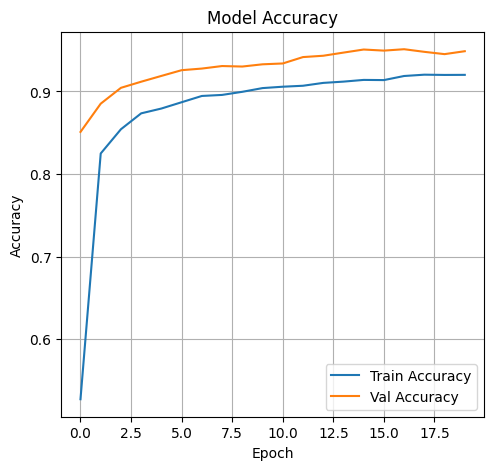

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy after model update:", test_acc)
# Plotting Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

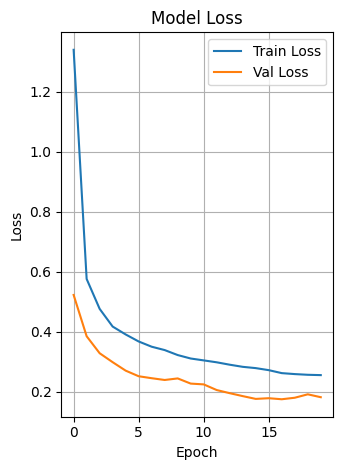

In [ ]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

* Validation accuracy is higher than traing accuracy.
* Both accuracy curves are rising and stabilising.
* Validation loss is lower than training loss.

# Adding Dense layer before final output and BatchNormalization after each Conv2D block:

In [ ]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),  # New dense layer added
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/30
1313/1313 [==============================] - 142s 107ms/step - loss: 2.2638 - accuracy: 0.1341 - val_loss: 1.9979 - val_accuracy: 0.2861
Epoch 2/30
1313/1313 [==============================] - 131s 100ms/step - loss: 1.8366 - accuracy: 0.3018 - val_loss: 1.5188 - val_accuracy: 0.4074
Epoch 3/30
1313/1313 [==============================] - 132s 100ms/step - loss: 1.6619 - accuracy: 0.3556 - val_loss: 1.3024 - val_accuracy: 0.5107
Epoch 4/30
1313/1313 [==============================] - 131s 100ms/step - loss: 1.4816 - accuracy: 0.4372 - val_loss: 1.1456 - val_accuracy: 0.5785
Epoch 5/30
1313/1313 [==============================] - 131s 100ms/step - loss: 1.3996 - accuracy: 0.4687 - val_loss: 1.1282 - val_accuracy: 0.6185
Epoch 6/30
1313/1313 [==============================] - 131s 99ms/step - loss: 1.3118 - accuracy: 0.5086 - val_loss: 0.9012 - val_accuracy: 0.7257
Epoch 7/30
1313/1313 [==============================] - 131s 100ms/step - loss: 1.0874 - accuracy: 0.6131 - val_l

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy after BatchNorm and extra Dense layer:", test_acc)

563/563 [==============================] - 9s 15ms/step - loss: 0.2770 - accuracy: 0.9197
Test accuracy after BatchNorm and extra Dense layer: 0.9196666479110718


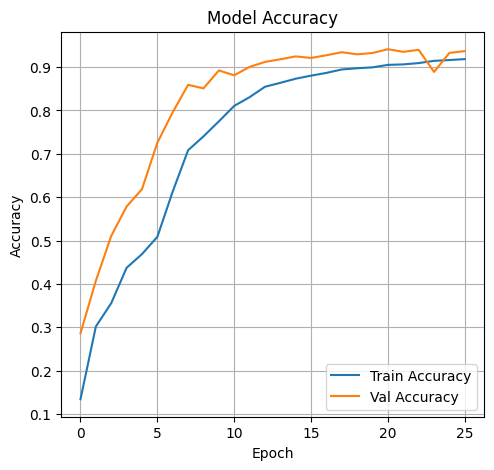

In [ ]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

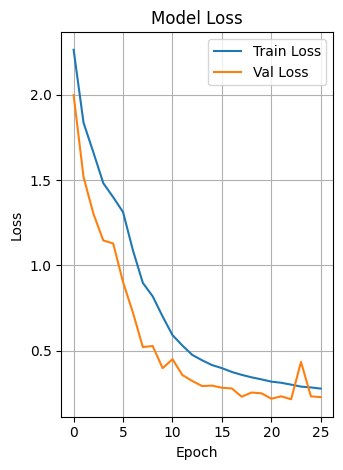

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

* Gap between training and validation accuracy has decreased.
* The model is more stable.